Hello Brandon!

My name is Dmitry.  I'm glad to review your work today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import os

from scipy import stats

# 1. Data Loading

In [2]:
# Open the data file and study the general information

In [3]:
df = pd.read_csv("/datasets/games.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pro tip: it's useful to check for duplicates.
</div>

# 2. Prepare the data

In [5]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Dealing with missing values and convert data to the required type
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

df["year_of_release"] = df["year_of_release"].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [7]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,7983.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,68.994363
std,5.877050,0.818416,0.506696,0.311082,0.187994,13.920060
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
#df['critic_score'].fillna(df['critic_score'].median(), inplace=True)
dummy_value = -1
df['critic_score'].fillna(dummy_value, inplace=True)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Why do you think that such a replacement is appropriate? It's better to fill NaNs with dummy value here.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

 edited
</div>

In [9]:
#df['user_score'].replace('tbd', np.nan, inplace=True)
df['user_score'].replace('tbd', dummy_value, inplace=True)
df['user_score'].fillna(dummy_value, inplace=True)

In [10]:
#df['user_score'] = df['user_score'].astype(float)
#df['user_score'].fillna(df['user_score'].median(), inplace=True)
df['user_score'] = df['user_score'].astype(float)

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Why do you think that such a replacement is appropriate? It's better to fill NaNs with dummy value here.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

 edited
</div>

In [11]:
df['rating'].fillna('Unknown', inplace=True)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct.
</div>

In [12]:
#add new features
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [13]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unknown,31.38


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>We have NaNs in name and genre also. Please check these columns.
</div>

In [14]:
df['name'].fillna("Unknown", inplace=True)
df['genre'].fillna("Unknown", inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
 11  total_sales      16446 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

 edited
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

# 3. Analyze the data

In [16]:
# Look at how many games were released in different years. Is the data for every period significant?
games_per_year = df['year_of_release'].value_counts().sort_index()

In [17]:
games_per_year.reset_index()

,index,year_of_release
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


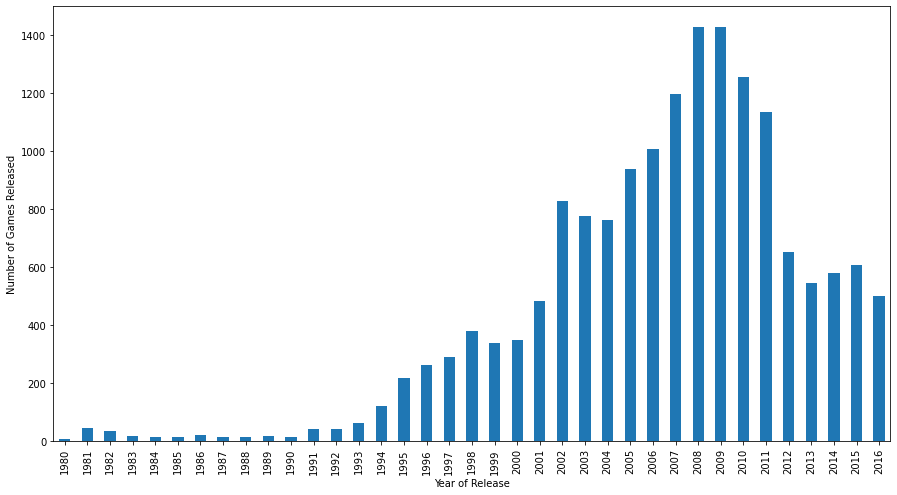

In [18]:
plt.figure(figsize=(15, 8))
games_per_year.plot.bar()
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.show()

According to the above graph, it looks like the rise of games and gaming platforms started in the late 90's. It can be seen that in the 80's not many games were released but changes in the 90's to the 21st century.

In [19]:
# Look at how sales varied from platform to platform.
platform_sales = df.groupby('platform')[['total_sales']].sum().sort_values('total_sales', ascending=False)
total_sales_per_platform = platform_sales.sum(axis=1)
total_sales_per_platform

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
dtype: float64

In [20]:
top_selling_platforms = total_sales_per_platform.nlargest(5)
top_selling_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
dtype: float64

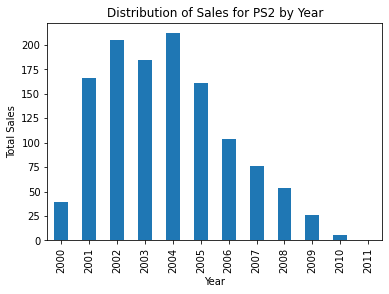

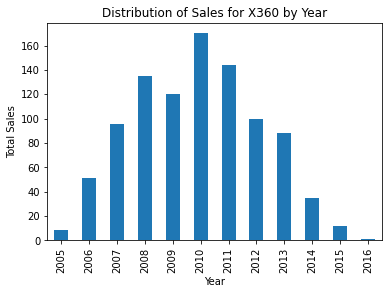

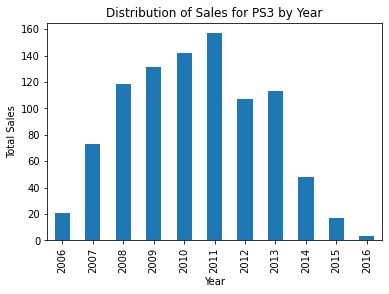

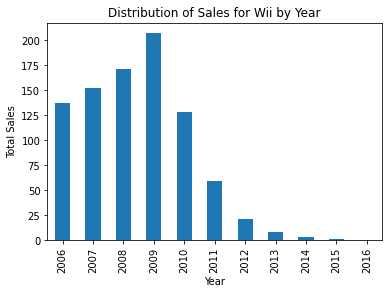

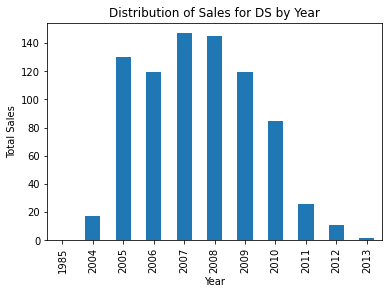

In [21]:
platform_year_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum()

for platform in top_selling_platforms.index:
    platform_data = platform_year_sales.loc[platform]
    platform_data.plot(kind='bar', title=f'Distribution of Sales for {platform} by Year')
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.show()

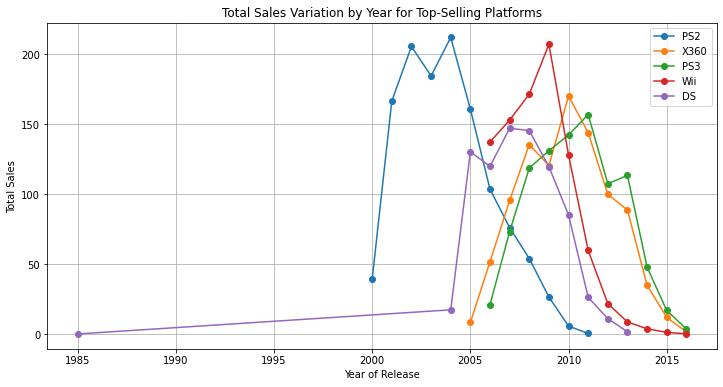

In [22]:
plt.figure(figsize=(12, 6))
for platform in top_selling_platforms.index:
    platform_data = df[df['platform'] == platform]
    sales_per_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(sales_per_year.index, sales_per_year.values, marker='o', label=platform)

plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.title('Total Sales Variation by Year for Top-Selling Platforms')
plt.legend()
plt.grid(True)
plt.show()

According to the above two plots, it is evidently clear that sales data for the platforms with greatest total sales is not normally distributed. The data is positively skewed which means that data conatains large data points and mean value is greater than the median. This can be considered a good point as positively skewed sales represent good behaviour.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good analysis and nice graphs.
</div>

In [23]:
# Find platforms that used to be popular but now have zero sales.
df2 = df.copy()
df_2016 = df2[df2['year_of_release'] == 2016]['platform'].unique()
df2 = df2[(df2['total_sales'] >= 0.5) & (df2['platform'].isin(df_2016) == False)]
df2['platform'].unique()

array(['NES', 'GB', 'DS', 'PS2', 'SNES', 'GBA', 'N64', 'PS', 'XB', '2600',
       'PSP', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS'], dtype=object)

In [24]:
# How long does it generally take for new platforms to appear and old ones to fade?
platform_first_year = df.groupby('platform')['year_of_release'].min()
platform_last_year = df.groupby('platform')['year_of_release'].max()

platform_lifespan = platform_last_year - platform_first_year
platform_lifespan

platform
2600     9
3DO      1
3DS      5
DC      10
DS      28
GB      13
GBA      7
GC       6
GEN      4
GG       0
N64      6
NES     11
NG       3
PC      31
PCFX     0
PS       9
PS2     11
PS3     10
PS4      3
PSP     11
PSV      5
SAT      5
SCD      1
SNES     9
TG16     0
WS       2
Wii     10
WiiU     4
X360    11
XB       8
XOne     3
Name: year_of_release, dtype: int64

In [25]:
platform_lifespan.mean()

7.612903225806452

In [26]:
# Determining data from which period should be chosen

In [27]:
df_filter = df[df['year_of_release'] == 2016]['platform'].unique()
df_filter

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [28]:
# relevant_years = df[df['platform'].isin(df_filter)]['year_of_release'].unique()
# relevant_years

In [29]:
# platform_years = df[df['platform'].isin(df_filter)].groupby('platform')['year_of_release'].unique()
# platform_years

In [30]:
# n_platform_years = df[df['platform'].isin(df_filter)].groupby('platform')['year_of_release'].nunique()
# n_platform_years

Decide to ignore PC platform as it was an extreme outlier. If PC was included then all the other time periods would also get selected which would not present any relevant data for the rest of the selected platforms and it will become redundant.

In [31]:
# df_filter = np.delete(df_filter, 5)
# df_filter

Was ignoring PC platoform, since we are only taking 2-3 years to forecasting next year's sales. I will include PC platform.

In [32]:
relevant_years = df[df['platform'].isin(df_filter)]['year_of_release'].unique()
relevant_years = pd.Series(relevant_years).sort_values(ascending=False).values
relevant_years = relevant_years[:3]
relevant_years

array([2016, 2015, 2014])

In [33]:
# Selecting relevant data
df_final = df[(df['year_of_release'].isin(relevant_years)) & (df['platform'].isin(df_filter))]
df_final

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,Unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16434,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16438,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16443,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>It is uncommon to use data for more than 2-3 years when forecasting next year's sales, even in case of traditional businesses. And in the dynamic computer games industry, taking longer time intervals should be avoided as it will definitely lead to tracking some obsolete trends. But you shouldn't take too short a period either.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

edited, using only the recent 3 year
</div>

In [34]:
# Which platforms are leading in sales?
df_final.groupby(['platform'])['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False)

,platform,total_sales
3,PS4,288.15
8,XOne,140.36
0,3DS,86.68
2,PS3,68.18
7,X360,48.22
6,WiiU,42.98
1,PC,27.05
4,PSV,22.40
5,Wii,5.07


Text(0.5, 0, 'Year of Release')

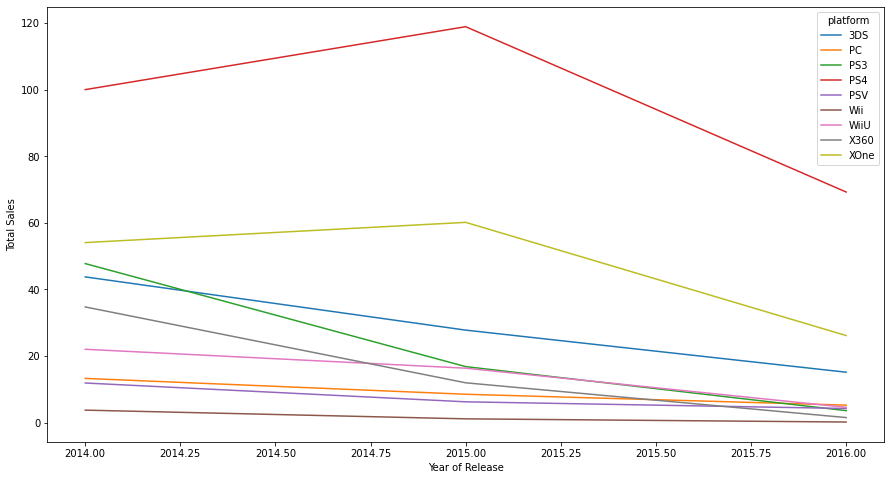

In [35]:
# Which ones are growing or shrinking?
growth = df_final.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
growth = growth.fillna(0)
growth.plot(figsize = (15, 8))
plt.ylabel('Total Sales')
plt.xlabel('Year of Release')

The above graph shows which of the platforms are growing and shrinking in sales. According to the above graph, the platforms that are currently in the growth phase are PS4, XOne and agrueably 3DS are growing in sales. The rest of the remaining platforms are shrinking in sales according to the above graph.

In [36]:
# Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant?  
platform_sales_summary = df_final.groupby(['platform', 'name'])['total_sales'].sum().reset_index()

In [37]:
avg_sales = []

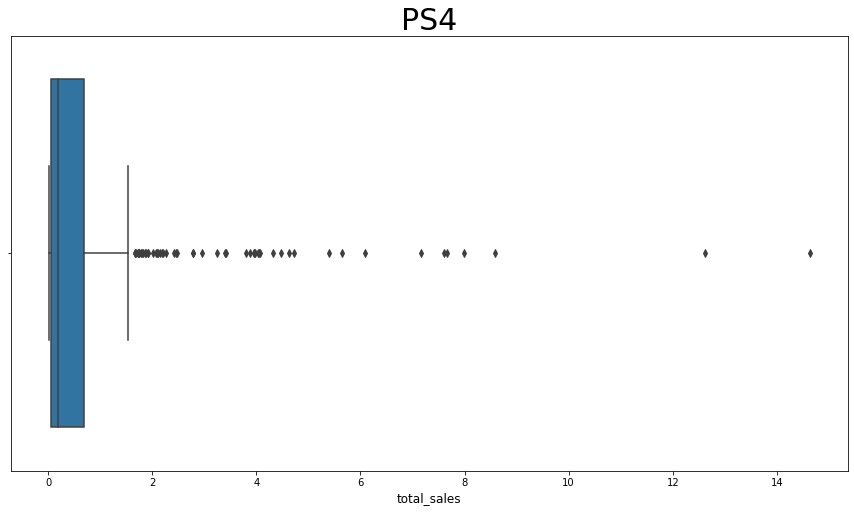

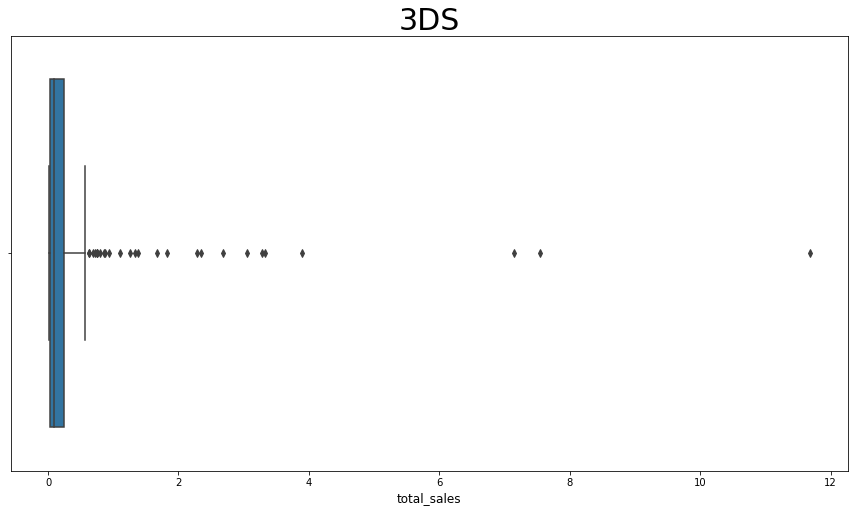

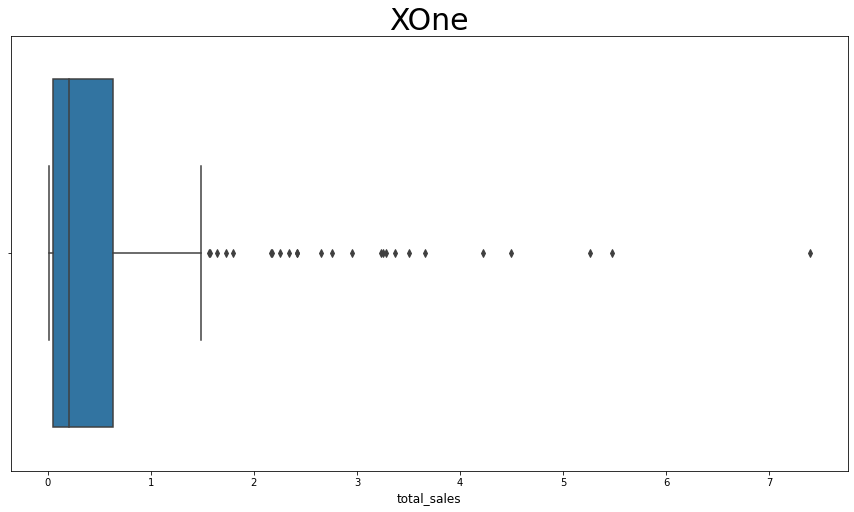

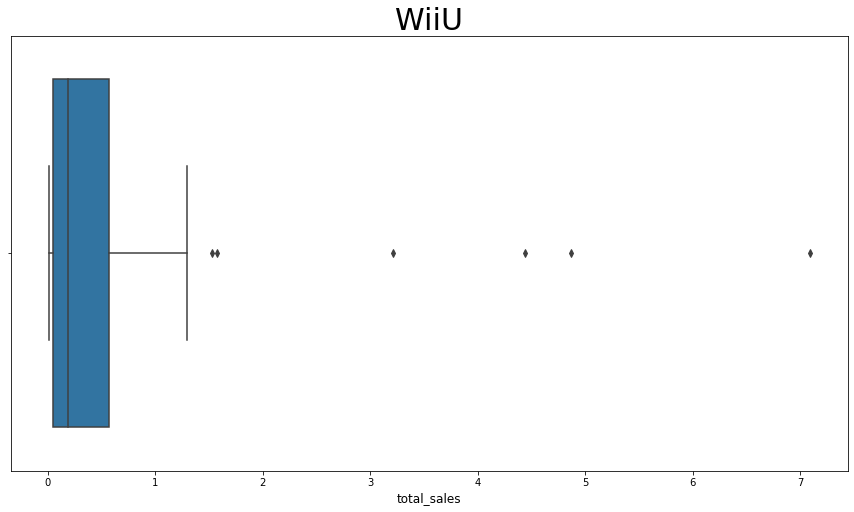

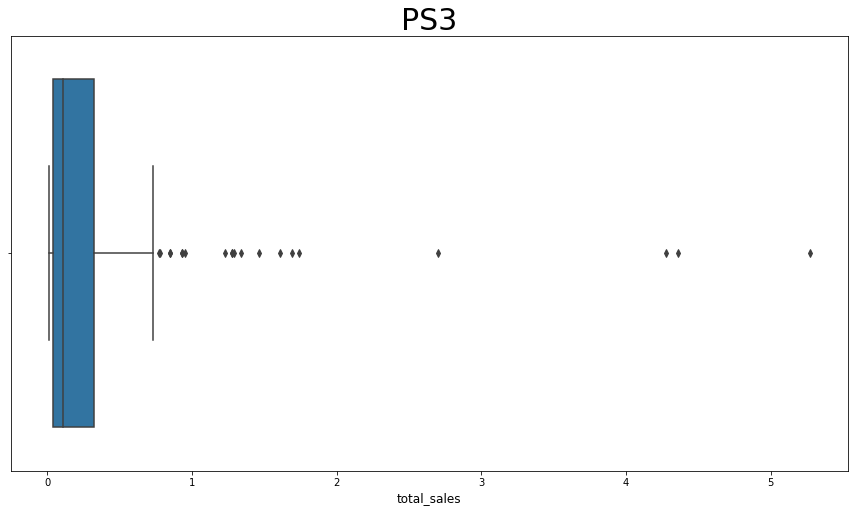

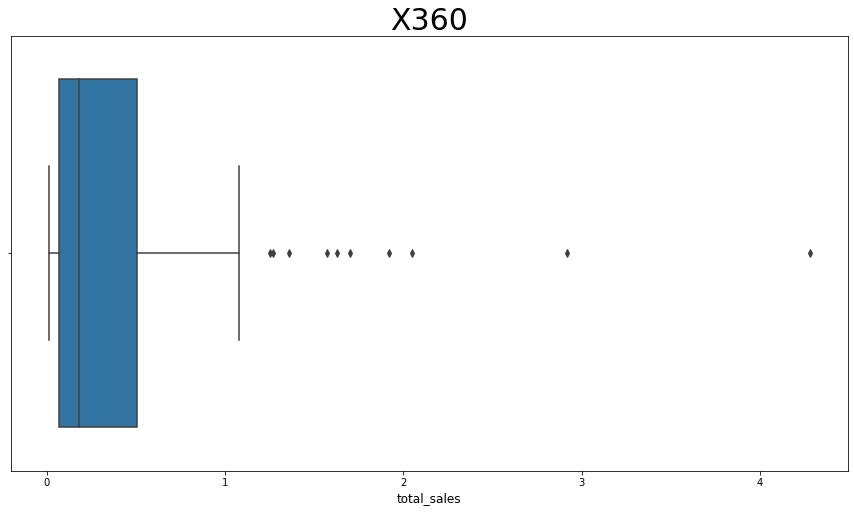

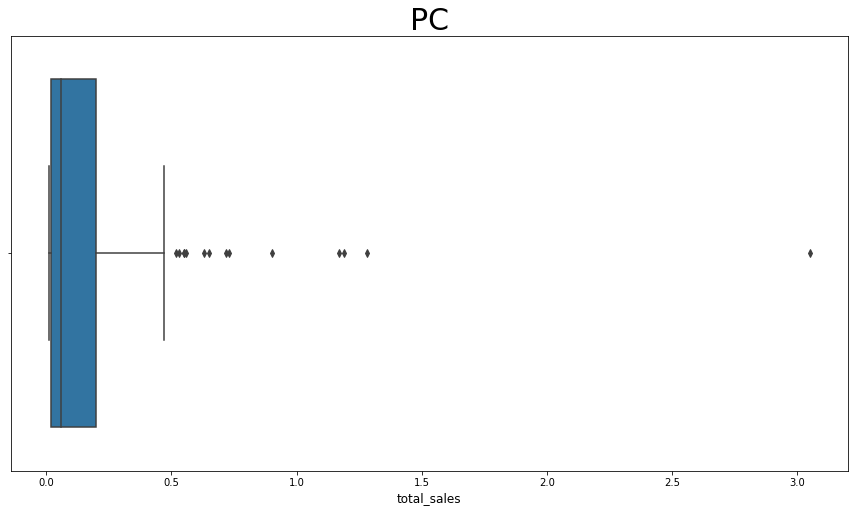

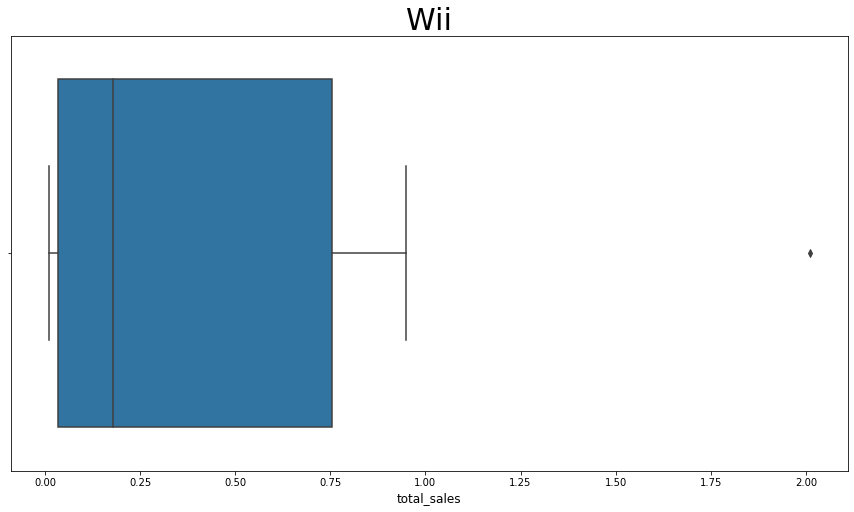

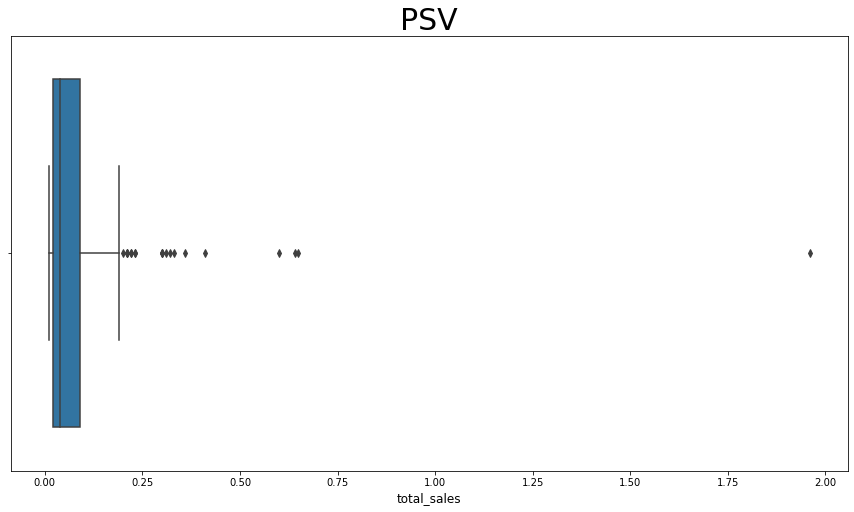

In [38]:
for platform in df_final['platform'].unique():
    plt.figure(figsize=(15, 8))
    plt.xlabel('Total Sales', size=12)
    plt.title(platform, size=30)
    sns.boxplot(x='total_sales', data=platform_sales_summary[platform_sales_summary['platform'] == platform])
    avg_sales.append(platform_sales_summary[platform_sales_summary['platform'] == platform].mean())
    plt.show()

In [39]:
#What about average sales on various platforms?
for i, platform in enumerate(df_final['platform'].unique()):
    print(f"average {platform} sales: {avg_sales[i]}")

average PS4 sales: total_sales    0.766356
dtype: float64
average 3DS sales: total_sales    0.408868
dtype: float64
average XOne sales: total_sales    0.615614
dtype: float64
average WiiU sales: total_sales    0.588767
dtype: float64
average PS3 sales: total_sales    0.311324
dtype: float64
average X360 sales: total_sales    0.434414
dtype: float64
average PC sales: total_sales    0.179139
dtype: float64
average Wii sales: total_sales    0.460909
dtype: float64
average PSV sales: total_sales    0.075932
dtype: float64


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

It's better to plot boxplots on the same graph. Also, we can add graph without outliers.
</div>

The difference is sales is quite visible and significant in the above graphs. Every platform has a lot of positive outliers but it can also be seen that most of the outliers are clustered close to the maximum value. The average sales values for most of the platforms are pretty close except for the PSV and PC platform. These similarities indicate that the selected platforms and time periods will give a good insight to compute results for 2017 as they are all closely connected in terms of their statistical features.

In [40]:
# Take a look at how user and professional reviews affect sales for one popular platform
# Chooses PS4 as a platform to draw a scatter plot
popular_platform_data = df_final[df_final['platform'] == 'PS4'][['name', 'critic_score', 'total_sales']]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


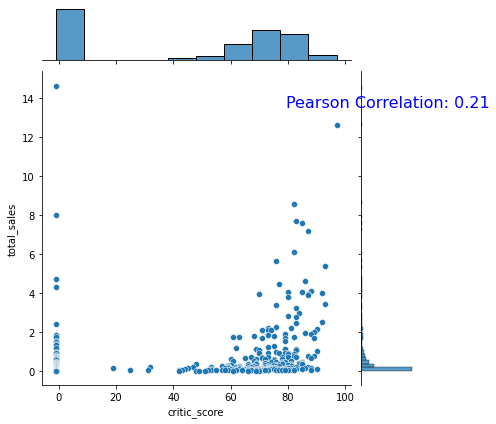

In [41]:
# Build a scatter plot and calculate the correlation between reviews and sales.
sns.jointplot('critic_score', y='total_sales', data=popular_platform_data, kind='scatter')

pearson_corr, _ = stats.pearsonr(popular_platform_data['critic_score'], popular_platform_data['total_sales'])

plt.annotate(f'Pearson Correlation: {pearson_corr:.2f}', 
             xy=(0.5, 0.9), xycoords='axes fraction', 
             ha='center', va='center', 
             fontsize=16, color='blue')

plt.show()

The correlation score for them is 0.21 which means that the two columns are positively correlated. It means a good or higher critic_score will fetch higher sales for the PS4 platform.

In [42]:
df_final2 = df_final[df_final['user_score'] != 'tbd']
df_final2.user_score = df_final2.user_score.astype('float64')

In [43]:
popular_platform_data2 = df_final2[df_final2['platform'] == 'PS4'][['name', 'user_score', 'total_sales']]

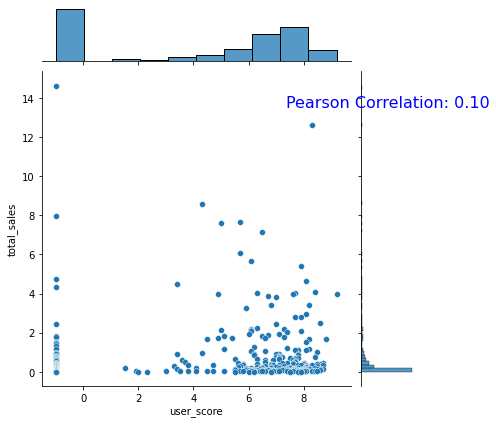

In [44]:
sns.jointplot(x='user_score', y='total_sales', data=popular_platform_data2, kind='scatter')

pearson_corr, _ = stats.pearsonr(popular_platform_data2['user_score'], popular_platform_data2['total_sales'])

plt.annotate(f'Pearson Correlation: {pearson_corr:.2f}', 
             xy=(0.5, 0.9), xycoords='axes fraction', 
             ha='center', va='center', 
             fontsize=16, color='blue')

plt.show()

The correlation score for them is 0.10 which means that the two columns display a very loose negative correlation. As the correlation score is very close to 0, so the two columns wont display any correlated behaviour(not negative or positive). This suggests that no matter what the value of user_score is, it wont affect the sales of PS4 platform according to the provided data.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

In [45]:
# Take a look at the general distribution of games by genre. 
general_distribution = df_final.groupby(['platform', 'genre'])['name'].count().unstack()
general_distribution = general_distribution.fillna(0)

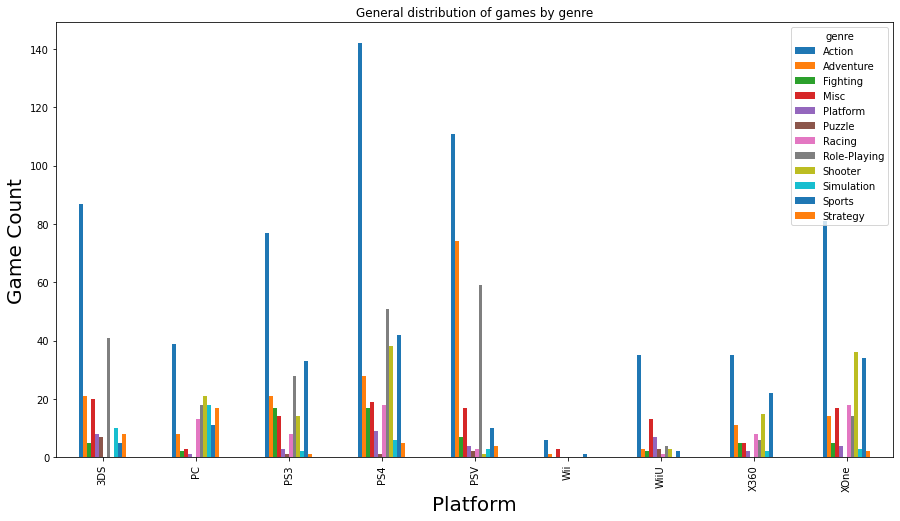

In [46]:
general_distribution.plot.bar(figsize = (15, 8))
plt.title("General distribution of games by genre")
plt.xlabel('Platform', size=20)
plt.ylabel('Game Count', size=20)
plt.show()

Graph displays which platform released how much game of which genre over the course of our chosen time periods.

In [47]:
# Generalize about genres with high and low sales?
sales = df_final.groupby(['genre'])['total_sales'].sum().reset_index().sort_values('total_sales')

Text(0, 0.5, 'Total Sales')

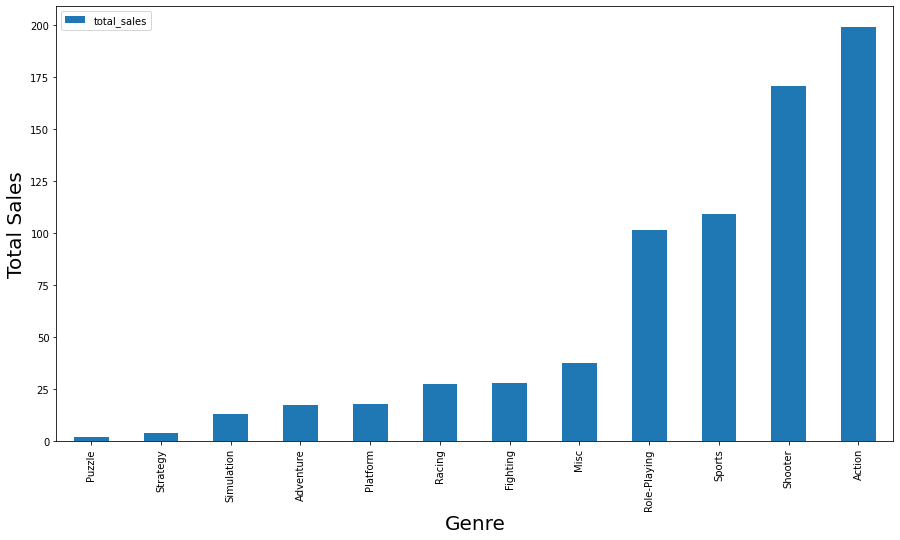

In [48]:
sales.plot.bar(x='genre', y='total_sales', figsize=(15,8))
plt.xlabel('Genre', size=20)
plt.ylabel('Total Sales', size=20)

According to the above graph, the most profitable genres are related to competitive type gaming genres such as Action, Shooter, and Sports. We can generalize that games where users can play against some other users are considered most profitable ones than the rest of the games. It can also be noted from the other graph above that games which are available on other devices also fetch higher sales than the games which only available in specific platforms.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job.
</div>

# 4. Create a user profile for each region

In [49]:
# The top five platforms.
na_top5_platform = df_final.groupby(['platform'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False).head()
na_top5_platform = na_top5_platform.set_index('platform')

Text(0, 0.5, 'Sales')

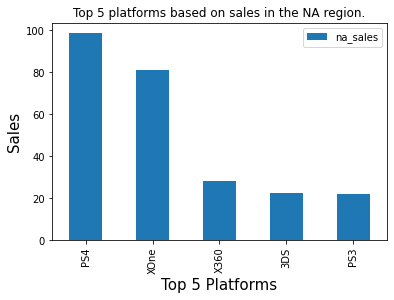

In [50]:
na_top5_platform.plot.bar()
plt.title("Top 5 platforms based on sales in the NA region.")
plt.xlabel('Top 5 Platforms', size=15)
plt.ylabel('Sales', size=15)

In [51]:
eu_top5_platform = df_final.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False).head()
eu_top5_platform = eu_top5_platform.set_index('platform')

Text(0, 0.5, 'Sales')

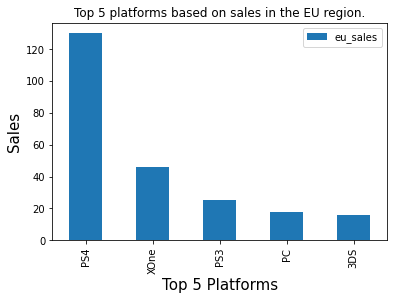

In [52]:
eu_top5_platform.plot.bar()
plt.title("Top 5 platforms based on sales in the EU region.")
plt.xlabel('Top 5 Platforms', size=15)
plt.ylabel('Sales', size=15)

In [53]:
jp_top5_platform = df_final.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False).head()
jp_top5_platform = jp_top5_platform.set_index('platform')

Text(0, 0.5, 'Sales')

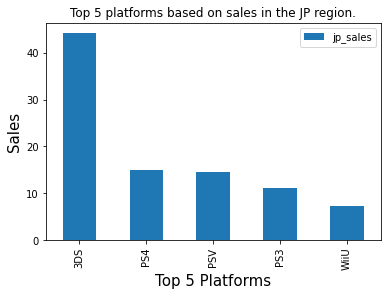

In [54]:
jp_top5_platform.plot.bar()
plt.title("Top 5 platforms based on sales in the JP region.")
plt.xlabel('Top 5 Platforms', size=15)
plt.ylabel('Sales', size=15)

In [55]:
#  Describe variations in their market shares from region to region.
tms = df_final['total_sales'].sum()
tms

729.09

In [56]:
#NA market shares
na_ms = df_final['na_sales'].sum()
na_ms / tms *100

38.96089645997065

In [57]:
#EU market shares
eu_ms = df_final['eu_sales'].sum()
eu_ms / tms *100

37.12573207697265

In [58]:
#JP market shares
jp_ms = df_final['jp_sales'].sum()
jp_ms / tms *100

12.718594412212484

According to the above results, it is concluded that out of the 100% market share of 702, the na region occupies 39.4%, the eu region occupies 36.0%, and the jp region occupies 13.2%. The remaining market share is occupied by the other_sales column in the original dataset.

In [59]:
# The top five genres.
na_top5_genre = df_final.groupby(['genre'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False).head()
na_top5_genre = na_top5_genre.set_index('genre')

Text(0, 0.5, 'Sales')

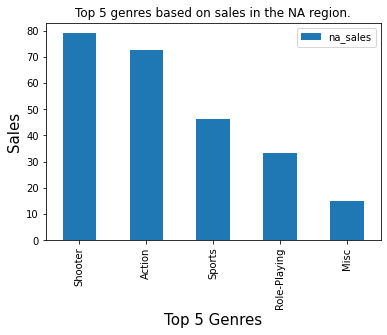

In [60]:
na_top5_genre.plot.bar()
plt.title("Top 5 genres based on sales in the NA region.")
plt.xlabel('Top 5 Genres', size=15)
plt.ylabel('Sales', size=15)

In [61]:
eu_top5_genre = df_final.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False).head()
eu_top5_genre = eu_top5_genre.set_index('genre')

Text(0, 0.5, 'Sales')

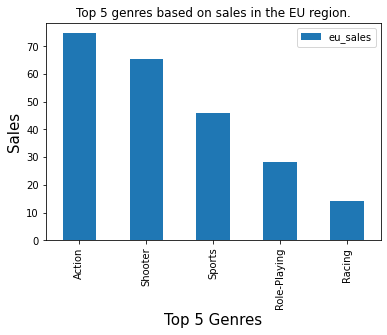

In [62]:
eu_top5_genre.plot.bar()
plt.title("Top 5 genres based on sales in the EU region.")
plt.xlabel('Top 5 Genres', size=15)
plt.ylabel('Sales', size=15)

In [63]:
jp_top5_genre = df_final.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False).head()
jp_top5_genre = jp_top5_genre.set_index('genre')

Text(0, 0.5, 'Sales')

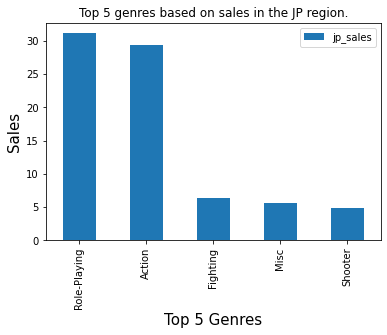

In [64]:
jp_top5_genre.plot.bar()
plt.title("Top 5 genres based on sales in the JP region.")
plt.xlabel('Top 5 Genres', size=15)
plt.ylabel('Sales', size=15)

In [65]:
# Do ESRB ratings affect sales in individual regions?
na_esrb = df_final.groupby(['rating'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False)
na_esrb = na_esrb.set_index('rating')

Text(0, 0.5, 'Sales')

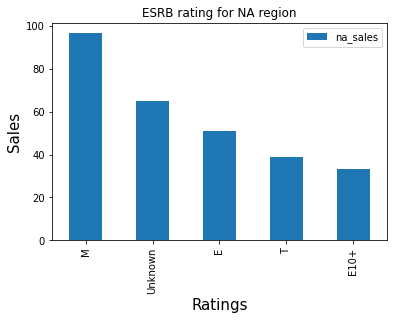

In [66]:
na_esrb.plot.bar()
plt.title("ESRB rating for NA region")
plt.xlabel('Ratings', size=15)
plt.ylabel('Sales', size=15)

In [67]:
eu_esrb = df_final.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False)
eu_esrb = eu_esrb.set_index('rating')

Text(0, 0.5, 'Sales')

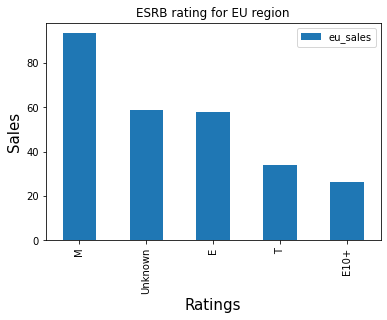

In [68]:
eu_esrb.plot.bar()
plt.title("ESRB rating for EU region")
plt.xlabel('Ratings', size=15)
plt.ylabel('Sales', size=15)

In [69]:
jp_esrb = df_final.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False)
jp_esrb = jp_esrb.set_index('rating')

Text(0, 0.5, 'Sales')

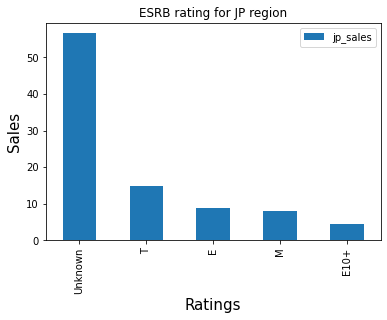

In [70]:
jp_esrb.plot.bar()
plt.title("ESRB rating for JP region")
plt.xlabel('Ratings', size=15)
plt.ylabel('Sales', size=15)

The graph shows that the sales with ESRB rating affect the number of sales. NA and EU has most sales in rating M and E while JP has most sales in rating 'Unknown'. So, this indicate the ESRB rating does affect sales in and seems like rating M is the most popuplar on EU and NA.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Ok, but it's better to use piecharts here. Also, subplots can increase readability: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
</div>

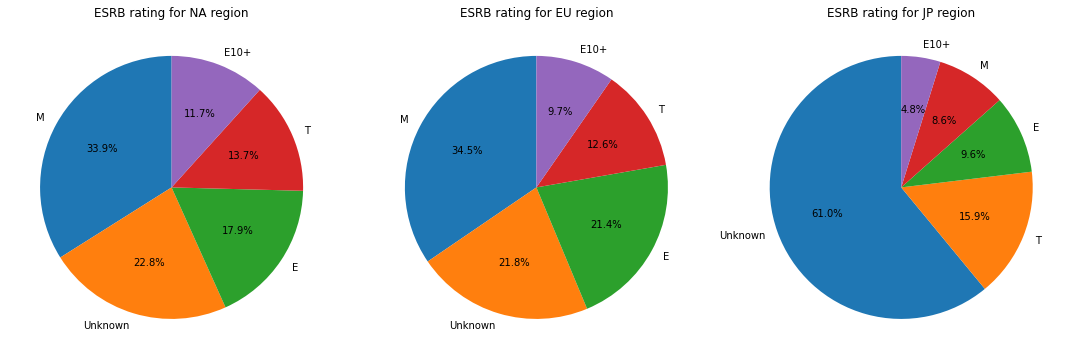

In [71]:
na_esrb = df_final.groupby(['rating'])['na_sales'].sum().reset_index().sort_values('na_sales', ascending=False)
na_esrb = na_esrb.set_index('rating')

eu_esrb = df_final.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending=False)
eu_esrb = eu_esrb.set_index('rating')

jp_esrb = df_final.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending=False)
jp_esrb = jp_esrb.set_index('rating')

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].pie(na_esrb['na_sales'], labels=na_esrb.index, autopct='%1.1f%%', startangle=90)
axs[0].set_title('ESRB rating for NA region')

axs[1].pie(eu_esrb['eu_sales'], labels=eu_esrb.index, autopct='%1.1f%%', startangle=90)
axs[1].set_title('ESRB rating for EU region')

axs[2].pie(jp_esrb['jp_sales'], labels=jp_esrb.index, autopct='%1.1f%%', startangle=90)
axs[2].set_title('ESRB rating for JP region')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

tried using subplots and uses pie chart. It has better readability.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent!
</div>

# 5. Hypothesis Testing

Testing whether average user ratings of the Xbox One and PC platforms are the same. 

Null Hypothesis (H0): The average user ratings of Xbox One and PC platforms are same.

Alternative Hypothesis (H1): The average user ratings of Xbox One and PC platforms are not same.

In [72]:
xbox_one_ratings = pd.to_numeric(df[df['platform'] == 'XOne']['user_score'], errors = 'coerce')
pc_ratings = pd.to_numeric(df[df['platform'] == 'PC']['user_score'], errors = 'coerce')

In [73]:
xbox_one_ratings.mean()

4.542105263157895

In [74]:
pc_ratings.mean()

5.36342737722048

In [75]:
alpha = 0.05

In [76]:
t_statistic, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)
print(t_statistic, p_value)

-3.2582594392906516 0.0012202763945006337


In [77]:
if p_value < alpha:
    print("Reject the null hypothesis, there are sufficient evidence that the average user ratings of Xbox One and PC platforms are not same.")
else:
    print("Accept the null hypothesis, not sufficient evidence that the average user ratings of Xbox One and PC platforms are not same.")

Reject the null hypothesis, there are sufficient evidence that the average user ratings of Xbox One and PC platforms are not same.


Testing whether average user ratings for the Action and Sports genres are different.

Null Hypothesis (H0): The average user ratings for Action and Sports genres are different.

Alternative Hypothesis (H1): The average user ratings for Action and Sports genres are not different.

In [78]:
action_ratings = pd.to_numeric(df[df['genre'] == 'Action']['user_score'], errors = 'coerce')
sports_ratings = pd.to_numeric(df[df['genre'] == 'Sports']['user_score'], errors = 'coerce')

In [79]:
alpha = 0.05

In [80]:
action_ratings.mean()

3.376292712428182

In [81]:
sports_ratings.mean()

2.7274501300954035

In [82]:
t_statistic, p_value = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)
print(t_statistic, p_value)

5.7871695604464986 7.595997985225161e-09


In [83]:
if p_value < alpha:
    print("Reject the null hypothesis, sufficient evidence that the average user ratings for Action and Sports genres are not different.")
else:
    print("Accept the null hypothesis, not sufficient evidence that the average user ratings for Action and Sports genres are not different.")

Reject the null hypothesis, sufficient evidence that the average user ratings for Action and Sports genres are not different.


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

# 6. Conclusion

- late 90s marked the beginning of gaming as an industry, with the 21st century solidifying gaming's status as a major industry.
- Game sales peaked in 2006 and have gradually declined since then, possibly due to improvements in games and console capacity.
- Platforms typically have an average lifespan of about 7 years
- The sales data for the platforms with greatest total sales is not normally distributed which can be considered a good point as positively skewed sales represent good behaviour.
- The platforms that are currently in the growth phase are PS4, XOne and agrueably 3DS are growing in sales.
- Different platforms can significantly impact a game's success, with competitive type gaming genres such as Action, Shooter, and Sports consistently being the most profitable.
- Geographical profiles and genres play a role in game popularity, providing insights for advertising strategies.
- ESRB ratings significantly affect game sales, highlighting the importance of evaluating game content for ratings.
- PC games tend to have higher ratings than Xbox games, but further investigation is needed for differences between sports and action game ratings.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great final conclusion!
</div>

<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>
    
Brandon, thank you for sending your project. You've done a really good job on it!

While there's room for improvement, on the whole, your project is impressive good. I like code style - very high level! Thank you for your detailed conclusions. They are wonderful. You did a great job!

<span class="text-danger">However, there are some issues. I wrote comments. Please elaborate them. Do not forget to check your findings after fixing!</span>
    
Every issue with our code is a chance for us to learn something new.

Good luck! :)
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment v2</b> <a class="tocSkip"></a>

Now your project is a true "A". Congratulations! 
    
I'm glad to say that your project has been accepted and you can go to the next sprint.
</div>